In [9]:
install.packages("eulerr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(rstatix)
library(parallel)
library(ggpubr)
library(ComplexHeatmap)
library(compositions)
library(ggsci)
library(math)
library(NatParksPalettes)
library(readr)
libray(ggvenn)
library(ggVennDiagram)


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4


Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    muta

ERROR: Error in library(compositions): there is no package called ‘compositions’


In [2]:
master <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/master_combined_DEG_list_all_celltypes_forfigs.csv")
head(master)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


# Venn Diagram for selected celltypes split by BR1 and BR2

## BR1

In [20]:
# List of cell types you want to subset
selected_celltypes <- c("Core CD14 monocyte", "ISG+ CD14 monocyte", 'IL1B+ CD14 monocyte', 'Intermediate monocyte', 'Core CD16 monocyte', 'ISG+ CD16 monocyte', 'C1Q+ CD16 monocyte')


# Subset the dataframe for selected cell types
subset_df <- master %>%
  filter(celltype %in% selected_celltypes, , master$padj <= 0.1, master$Direction == "BR1", master$sex == "Female") %>%
  mutate(
    celltype = factor(celltype, levels = selected_celltypes)
  )

head(subset_df)


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>
1,101351,927.0027,-0.1654941,0.04141482,-3.996011,6.441877e-05,0.03409637,cohort.cohortGuid,BR1,TNFAIP8L2,Core CD14 monocyte,Female
2,101357,274.2167,-0.1870299,0.04490537,-4.164979,3.113815e-05,0.03409637,cohort.cohortGuid,BR1,PAK1IP1,Core CD14 monocyte,Female
3,101361,2136.4435,-0.1800329,0.04458628,-4.037855,5.394217e-05,0.03409637,cohort.cohortGuid,BR1,DDX21,Core CD14 monocyte,Female
4,101363,888.5883,-0.1375409,0.03360493,-4.092879,4.260498e-05,0.03409637,cohort.cohortGuid,BR1,SCAMP2,Core CD14 monocyte,Female
5,101367,1218.0151,-0.1284547,0.03116100,-4.122290,3.751248e-05,0.03409637,cohort.cohortGuid,BR1,RAD23A,Core CD14 monocyte,Female
6,101370,1774.2442,-0.4196050,0.11094587,-3.782069,1.555300e-04,0.04215571,cohort.cohortGuid,BR1,SHTN1,Core CD14 monocyte,Female


In [15]:
# # Split the data into two sets: DEGs_Male and DEGs_Female
# degs_core_cd14 <- subset_df[subset_df$celltype == "Core CD14 monocyte", "gene"]
# degs_ISG_cd14 <- subset_df[subset_df$celltype == "ISG+ CD14 monocyte", "gene"]
# degs_IL1B_cd14 <- subset_df[subset_df$celltype == "IL1B+ CD14 monocyte", "gene"]
# degs_core_cd16 <- subset_df[subset_df$celltype == "Core CD16 monocyte", "gene"]
# degs_ISG_cd16 <- subset_df[subset_df$celltype == "ISG+ CD16 monocyte", "gene"]
# degs_CIQ_cd16 <- subset_df[subset_df$celltype == "C1Q+ CD16 monocyte", "gene"]
# degs_int_mono <- subset_df[subset_df$celltype == "Intermediate monocyte", "gene"]

# # Combine the two sets into one list variable 'a'
# a <- list(degs_core_cd14 = degs_core_cd14, degs_ISG_cd14 = degs_ISG_cd14,degs_IL1B_cd14= degs_IL1B_cd14, degs_core_cd16=degs_core_cd16,  degs_ISG_cd16=degs_ISG_cd16, degs_CIQ_cd16=degs_CIQ_cd16, degs_int_mono=degs_int_mono )
# a

In [21]:
# Filter data for IL1B+ CD14 monocytes
degs_IL1B_cd14 <- subset_df[subset_df$celltype == "IL1B+ CD14 monocyte", "gene"]

# Filter data for all non-IL1B+ CD14 monocytes
degs_other_mono <- subset_df[subset_df$celltype != "IL1B+ CD14 monocyte", "gene"]

# Remove duplicates from degs_IL1B_cd14
degs_IL1B_cd14 <- unique(degs_IL1B_cd14)

# Remove duplicates from degs_other_cd14
degs_other_mono <- unique(degs_other_mono)


# Combine the two sets into one list variable 'a'
a <- list(`IL1B+ CD14 monocyte` = degs_IL1B_cd14, `Other monocyte subsets` = degs_other_mono)


In [22]:
a

$`IL1B+ CD14 monocyte`
character(0)

$`Other monocyte subsets`
 [1] "TNFAIP8L2" "PAK1IP1"   "DDX21"     "SCAMP2"    "RAD23A"    "SHTN1"    
 [7] "DNPH1"     "DDX24"     "MRPS35"    "HSPD1"     "UTP18"     "UQCC2"    
[13] "NCOA7"     "MAFB"      "EXOSC5"    "ZNF22"     "GNPTG"     "VBP1"     
[19] "PA2G4"     "OSGEP"     "TRIM27"    "RPF2"      "SLC31A2"   "EVA1B"    
[25] "MTHFS"     "ABI3"      "ITGB2"

In [18]:
library(VennDiagram)

options(repr.plot.width = 10, repr.plot.height = 10)

# Generate plot
v <- venn.diagram(
  list(IL1B_CD14_monocyte = degs_IL1B_cd14,
       Other_monocyte_subsets = degs_other_mono),
  fill = c("orange", "blue"),
  cat.cex = 2, 
  cex = 2,
  cat.default.pos = "outer",
  cat.pos = c(-10, 10, 60),
  cat.dist = rep(0.1, 3), # Increase the distance between labels and the diagram
  cat.fontfamily = "sans",
  filename = NULL
)

# plot  
grid.newpage()
grid.draw(v)


ERROR: Error in VennDiagram::draw.pairwise.venn(area1 = length(x[[1]]), area2 = length(x[[2]]), : Unexpected parameter length for "cat.pos"


In [12]:
library(VennDiagram)

options(repr.plot.width = 10, repr.plot.height = 10)

# Define custom labels
#labels <- c("IL1B+ CD14 monocyte", "Other monocyte subsets")

# Generate plot
v <- venn.diagram(
  x = list(IL1B_CD14_monocyte = degs_IL1B_cd14,
           Other_monocyte_subsets = degs_other_mono),
  category.names = labels,
  fill = c("orange", "blue"),
  cat.cex = 2,
  cex = 2,
  cat.default.pos = "outer",
  cat.dist = rep(0.2, 1), # Increase the distance between labels and the diagram
  cat.fontfamily = "sans",
  filename = NULL
)

# plot  
grid.newpage()
grid.draw(v)


Loading required package: futile.logger


Attaching package: ‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    rotate




ERROR: Error in rep(category, 2): attempt to replicate an object of type 'closure'


In [111]:
library(eulerr)

# Create the plot object
p1 <- euler(a, shape = "ellipse")
# Set margin
par(mar=c(5,10,5,5))
# Specify colors and font size
png('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/venn_test1.png', width=800, height=600)  # Adjust width and height as needed
plot(p1, quantities = list(type = c("counts"), font=2, round=2, cex=1),
     labels = list(cex=1.5, fontsize =12),
     fill = c("skyblue", "orange"))
dev.off()


png 
  2

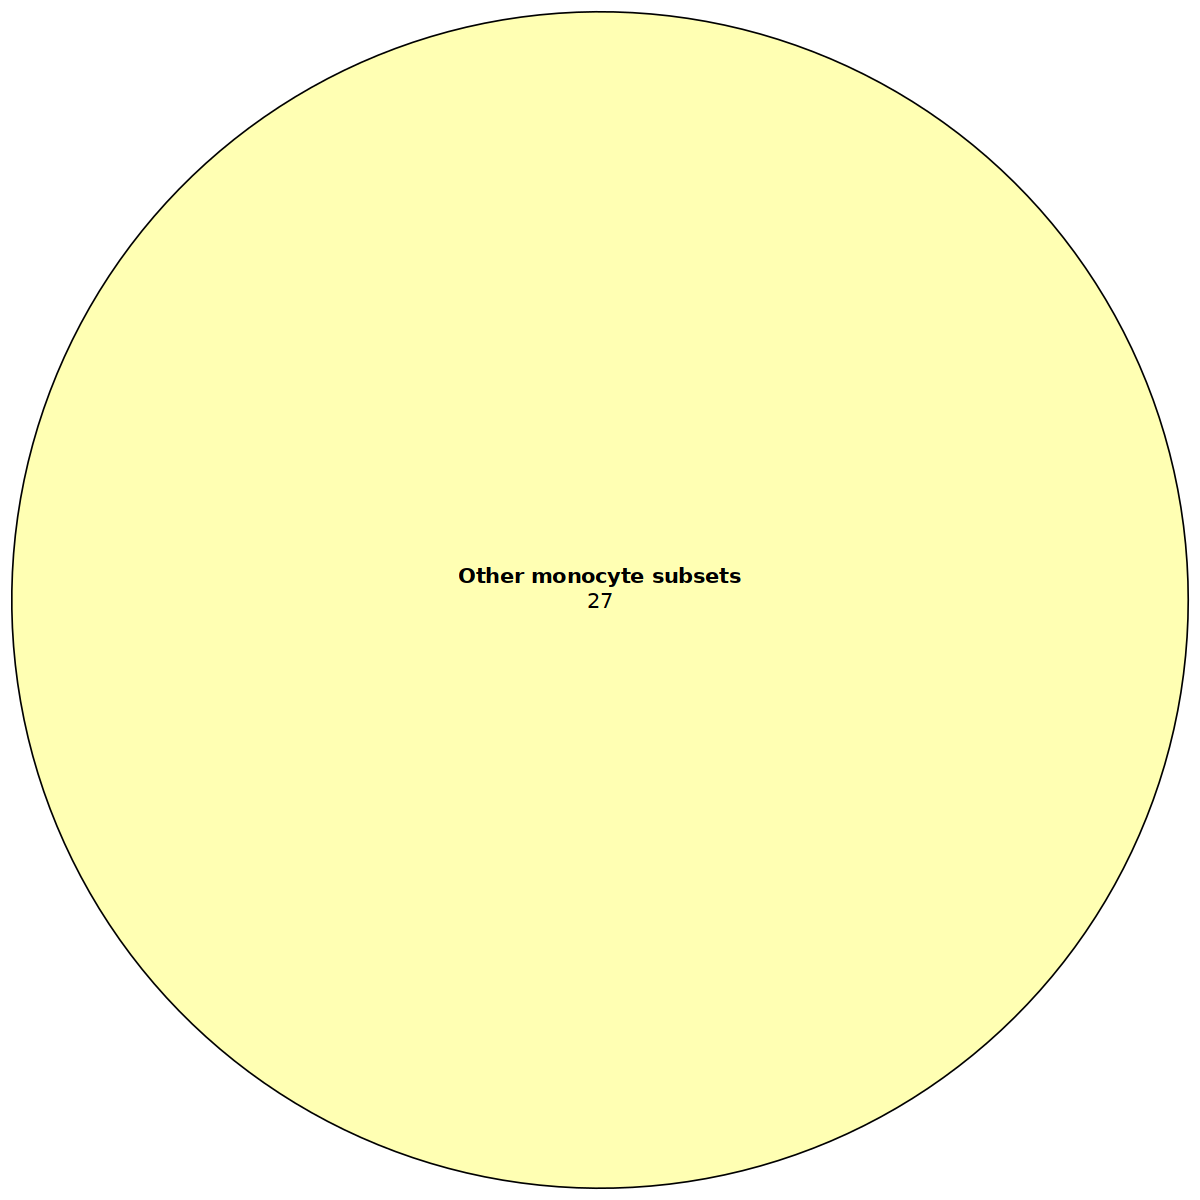

In [23]:
library(eulerr)

# Create the plot object
p1 <- euler(a, shape = "ellipse")

# Set margin
# par(mar=c(7,20,5,20))  # Adjust margins (bottom, left, top, right)

# Specify colors and font size
plot(p1, quantities = list(fontface = 5),
    fill = RColorBrewer::brewer.pal(4, "Set3"),
    border = "transparent",
    auto.key = list(space = "right"))

# # Save the plot as PNG
# png('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/venn_test1.png', width=800, height=600)  # Adjust width and height as needed
# plot(p1, quantities = list(type = c("counts"), font=2, round=2, cex=1),
#      font = 1:6,
#      labels = list(cex=1.5, fontsize =12),
#      fill = c("skyblue", "orange"))
# dev.off()  # Close the PNG device


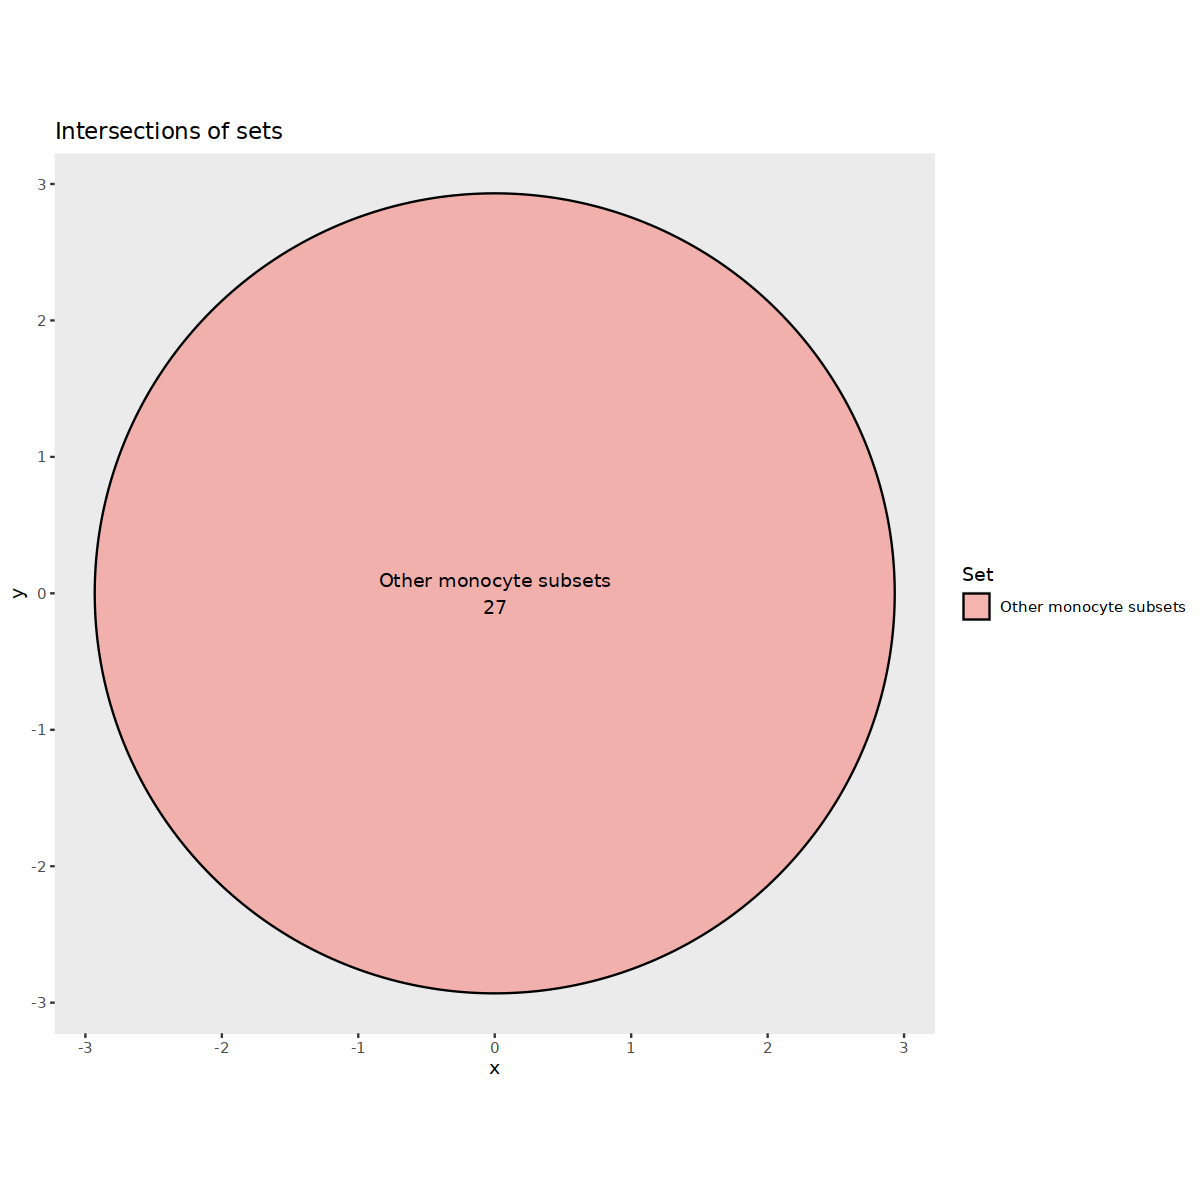

In [24]:
ggeulerr <- function(combinations, show_quantities = TRUE, show_labels = TRUE, ...) {
  data <-
    eulerr::euler(combinations = combinations) %>%
    plot(quantities = show_quantities) %>%
    pluck("data")
  
  tibble() %>%
    ggplot() +
    ggforce::geom_ellipse(
      data = data$ellipses %>% as_tibble(rownames = "Set"),
      mapping = aes(x0 = h, y0 = k, a = a, b = b, angle = 0, fill = Set),
      alpha = 0.5
    ) +
    geom_text(
      data = {
        data$centers %>%
          mutate(
            label = labels %>% map2(quantities, ~ {
              if (!is.na(.x) && !is.na(.y) && show_labels) {
                paste0(.x, "\n", sprintf(.y, fmt = "%.2g"))
              } else if (!is.na(.x) && show_labels) {
                .x
              } else if (!is.na(.y)) {
                .y
              } else {
                ""
              }
            })
          )
      },
      mapping = aes(x = x, y = y, label = label)
    ) +
    theme(panel.grid = element_blank()) +
    coord_fixed() +
    scale_fill_hue()
}

#
# Example
#

a %>%
  ggeulerr() +
  labs(title = "Intersections of sets")

In [54]:
library(ggforce)

In [53]:
install.packages("ggforce")

also installing the dependency ‘tweenr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## BR2

In [3]:
# List of cell types you want to subset
selected_celltypes <- c("Core CD14 monocyte", "ISG+ CD14 monocyte", 'IL1B+ CD14 monocyte', 'Intermediate monocyte', 'Core CD16 monocyte', 'ISG+ CD16 monocyte', 'C1Q+ CD16 monocyte')


# Subset the dataframe for selected cell types
subset_df <- master %>%
  filter(celltype %in% selected_celltypes, , master$padj <= 0.1, master$Direction == "BR2", master$sex == "Female") %>%
  mutate(
    celltype = factor(celltype, levels = selected_celltypes)
  )

head(subset_df)


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>
1,25584,26.2039,0.5401978,0.12130408,4.453253,8.457891e-06,0.05803805,cohort.cohortGuid,BR2,SIDT2,C1Q+ CD16 monocyte,Female
2,101349,265.7813,0.2566385,0.05439948,4.717664,2.385679e-06,0.01422580,cohort.cohortGuid,BR2,SFXN3,Core CD14 monocyte,Female
3,101350,218.7856,0.2396740,0.06165377,3.887418,1.013160e-04,0.03409637,cohort.cohortGuid,BR2,SKI,Core CD14 monocyte,Female
4,101352,810.2568,0.1489780,0.03741477,3.981796,6.839635e-05,0.03409637,cohort.cohortGuid,BR2,SFT2D2,Core CD14 monocyte,Female
5,101353,211.4110,0.3534366,0.08769865,4.030126,5.574702e-05,0.03409637,cohort.cohortGuid,BR2,AC012368.1,Core CD14 monocyte,Female
6,101354,561.4939,0.1654711,0.04222977,3.918350,8.915705e-05,0.03409637,cohort.cohortGuid,BR2,SESTD1,Core CD14 monocyte,Female


In [26]:
# Filter data for IL1B+ CD14 monocytes
degs_IL1B_cd14 <- subset_df[subset_df$celltype == "IL1B+ CD14 monocyte", "gene"]

# Filter data for all non-IL1B+ CD14 monocytes
degs_other_mono <- subset_df[subset_df$celltype != "IL1B+ CD14 monocyte", "gene"]

# Remove duplicates from degs_IL1B_cd14
degs_IL1B_cd14 <- unique(degs_IL1B_cd14)

# Remove duplicates from degs_other_cd14
degs_other_mono <- unique(degs_other_mono)


# Combine the two sets into one list variable 'a'
a <- list(`IL1B+ CD14 monocyte` = degs_IL1B_cd14, `Other monocyte subsets` = degs_other_mono)


In [12]:
# Split the data into two sets: DEGs_Male and DEGs_Female
degs_core_cd14 <- subset_df[subset_df$celltype == "Core CD14 monocyte", "gene"]
degs_ISG_cd14 <- subset_df[subset_df$celltype == "ISG+ CD14 monocyte", "gene"]
degs_IL1B_cd14 <- subset_df[subset_df$celltype == "IL1B+ CD14 monocyte", "gene"]
degs_core_cd16 <- subset_df[subset_df$celltype == "Core CD16 monocyte", "gene"]
degs_ISG_cd16 <- subset_df[subset_df$celltype == "ISG+ CD16 monocyte", "gene"]
degs_CIQ_cd16 <- subset_df[subset_df$celltype == "C1Q+ CD16 monocyte", "gene"]
#degs_int_mono <- subset_df[subset_df$celltype == "Intermediate monocyte", "gene"]

# Combine the two sets into one list variable 'a'
a <- list(degs_core_cd14 = degs_core_cd14, degs_ISG_cd14 = degs_ISG_cd14,degs_IL1B_cd14= degs_IL1B_cd14, degs_core_cd16=degs_core_cd16,  degs_ISG_cd16=degs_ISG_cd16, degs_CIQ_cd16=degs_CIQ_cd16 )
a

$degs_core_cd14
 [1] "SFXN3"      "SKI"        "SFT2D2"     "AC012368.1" "SESTD1"    
 [6] "NBEAL2"     "RAP2B"      "ORAI2"      "DENND5A"    "SORL1"     
[11] "BAZ2A"      "LINC02001"  "CD300E"     "C18orf25"   "MEF2D"     
[16] "GPR155"     "TNK2"       "HSH2D"      "CHST11"     "ZBTB18"    
[21] "SLC6A6"     "LIN7A"      "SLC12A6"    "PECAM1"     "SLC16A6"   
[26] "ZSWIM8"     "FAM53B"     "MHENCR"     "CIC"        "UVSSA"     
[31] "FAM214B"    "NHLRC3"     "NDRG1"      "RPS6KA5"    "DEF8"      
[36] "TP53INP1"   "FURIN"      "GRAMD4"     "IVNS1ABP"   "MED15"     
[41] "KSR1"       "CSF3R"      "ZNF385A"   

$degs_ISG_cd14
 [1] "ZBTB18"    "ANKRD13A"  "ATP13A3"   "PIM1"      "RPS6KA5"   "PECAM1"   
 [7] "CD300E"    "IP6K1"     "PPTC7"     "FCGR3A"    "ADAM8"     "LRMP"     
[13] "RAB11FIP4" "SORL1"     "NBEAL2"    "CD44"      "ZDHHC7"   

$degs_IL1B_cd14
 [1] "PTGS2"    "BCL2A1"   "NLRP3"    "OAZ1"     "G0S2"     "CMTM6"   
 [7] "RASGEF1B" "RIPK2"    "RABL6"    "SGK1"     "SELENOK" 

$degs_core_cd16
[1] "GIT1"

$degs_ISG_cd16
[1] "WARS"    "GBP5"    "ZDHHC20"

$degs_CIQ_cd16
[1] "SIDT2"

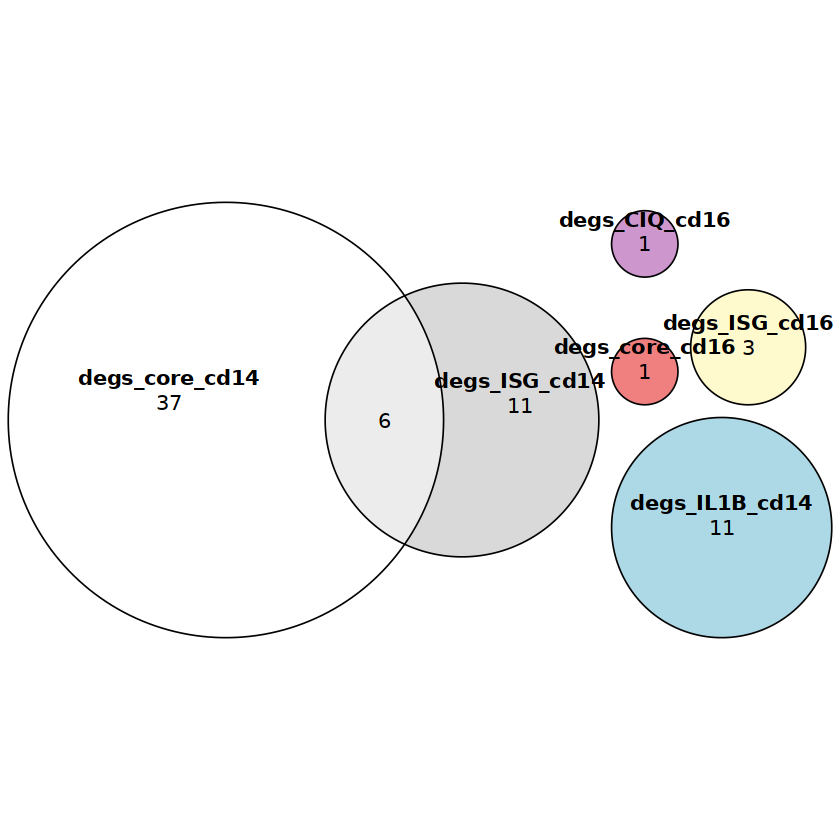

In [20]:
library(eulerr)
#plot(venn(a))
plot(euler(a, shape = "ellipse"), quantities = TRUE)

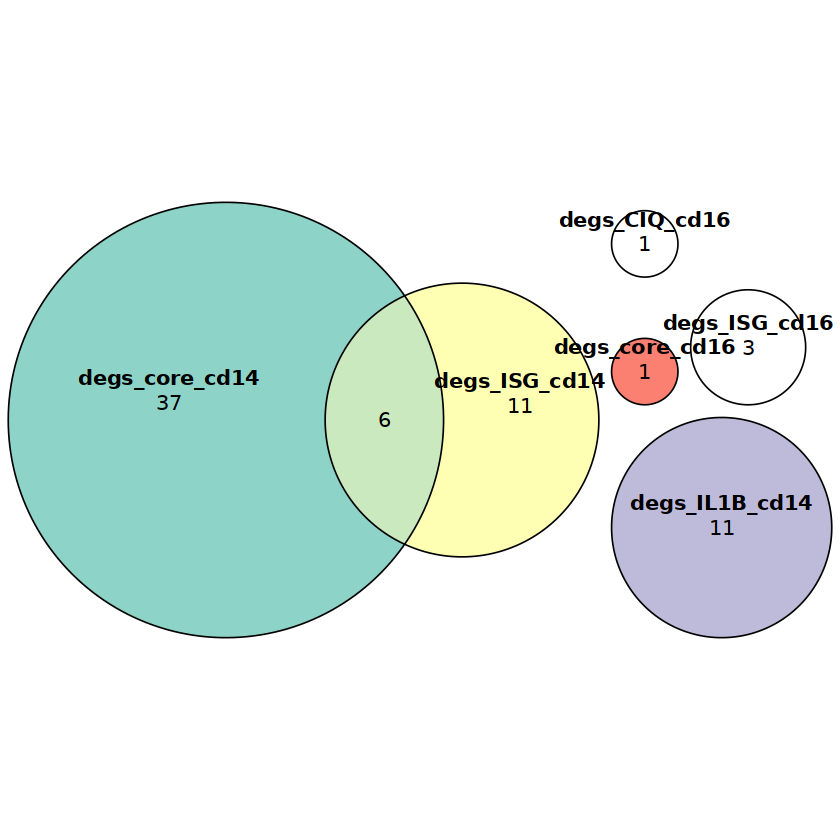

In [15]:
library(eulerr)

# Create the plot object
p1 <- euler(a, shape = "ellipse")

# Set margin
# par(mar=c(7,20,5,20))  # Adjust margins (bottom, left, top, right)

# Specify colors and font size
plot(p1, quantities = list(fontface = 5),
    fill = RColorBrewer::brewer.pal(4, "Set3"),
    border = "transparent",
    auto.key = list(space = "right"))

# # Save the plot as PNG
# png('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/venn_test1.png', width=800, height=600)  # Adjust width and height as needed
# plot(p1, quantities = list(type = c("counts"), font=2, round=2, cex=1),
#      font = 1:6,
#      labels = list(cex=1.5, fontsize =12),
#      fill = c("skyblue", "orange"))
# dev.off()  # Close the PNG device
